# Distinguish Your Own Digits (DYOD)

You are going to write a classifier that distinguishes between the number 3 and number 8.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

From the command line run `pip install mnist`. This is a library that will help you bring down the mnist dataset. If you run this from a notebook, you need to put  `!pip install mnist` in a cell by itself.

In [3]:
!pip install mnist

## Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


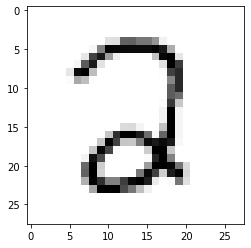

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

In [15]:
#Impoting functions from 'Kudzu'
from kudzu.model import Model
from kudzu.train import Learner
from kudzu.optim import GD
from kudzu.data import Data, Sampler,Dataloader

from kudzu.callbacks import AccCallback
from kudzu.callbacks import ClfCallback

from kudzu.loss import MSE

from kudzu.layer import Sigmoid,Relu
from kudzu.layer import Affine

### Let us create a `Config` class, to store important parameters. 
This class essentially plays the role of a dictionary.

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

### Running Models with the Training data
Details about the network layers:
- A first affine layer has 784 inputs and does 100 affine transforms. These are followed by a Relu
- A second affine layer has 100 inputs from the 100 activations of the past layer, and does 100 affine transforms. These are followed by a Relu
- A third affine layer has 100 activations and does 2 affine transformations to create an embedding for visualization. There is no non-linearity here.
- A final "logistic regression" which has an affine transform from 2 inputs to 1 output, which is squeezed through a sigmoid.


In [17]:
data = Data(X_train, y_train.reshape(-1,1))
sampler = Sampler(data, config.bs, shuffle=True)

dl = Dataloader(data, sampler)

opt = GD(config.lr)
loss = MSE()

In [18]:
training_data_x = X_train
testing_data_x = X_test
training_data_y = y_train.reshape(-1,1)
testing_data_y = y_test.reshape(-1,1)

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("last", 2, 1), Sigmoid("last")]
model_nn = Model(layers)
model_lr = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

xavier
xavier
xavier
xavier
xavier


In [20]:
nn_learner = Learner(loss, model_nn, opt, config.num_epochs)
acc_nn = ClfCallback(nn_learner, config.bs, training_data_x , testing_data_x, training_data_y, testing_data_y)
nn_learner.set_callbacks([acc_nn])

In [21]:
lr_learner = Learner(loss, model_lr, opt, config.num_epochs)
acc_lr = ClfCallback(lr_learner, config.bs, training_data_x , testing_data_x, training_data_y, testing_data_y)
lr_learner.set_callbacks([acc_lr])

In [22]:
nn_learner.train_loop(dl)

Epoch 0, Loss 0.2169
Training Accuracy: 0.7742, Testing Accuracy: 0.7762



Epoch 10, Loss 0.0749
Training Accuracy: 0.9296, Testing Accuracy: 0.9425



Epoch 20, Loss 0.0497
Training Accuracy: 0.9475, Testing Accuracy: 0.9602



Epoch 30, Loss 0.0406
Training Accuracy: 0.9560, Testing Accuracy: 0.9667



Epoch 40, Loss 0.0358
Training Accuracy: 0.9602, Testing Accuracy: 0.9677



Epoch 50, Loss 0.0327
Training Accuracy: 0.9628, Testing Accuracy: 0.9677



Epoch 60, Loss 0.0305
Training Accuracy: 0.9654, Testing Accuracy: 0.9693



Epoch 70, Loss 0.0289
Training Accuracy: 0.9666, Testing Accuracy: 0.9708



Epoch 80, Loss 0.0275
Training Accuracy: 0.9679, Testing Accuracy: 0.9718



Epoch 90, Loss 0.0264
Training Accuracy: 0.9697, Testing Accuracy: 0.9738



Epoch 100, Loss 0.0255
Training Accuracy: 0.9708, Testing Accuracy: 0.9738



Epoch 110, Loss 0.0247
Training Accuracy: 0.9718, Testing Accuracy: 0.9743



Epoch 120, Loss 0.024
Training Accuracy: 0.9723, Testing Accuracy: 0.9743



Epoch 130, Loss 0.0233
Training Accuracy: 0.9728, Testing Accuracy: 0.9738



Epoch 140, Loss 0.0227
Training Accuracy: 0.9740, Testing Accuracy: 0.9738



Epoch 150, Loss 0.0221
Training Accuracy: 0.9746, Testing Accuracy: 0.9738



Epoch 160, Loss 0.0216
Training Accuracy: 0.9749, Testing Accuracy: 0.9733



Epoch 170, Loss 0.0211
Training Accuracy: 0.9755, Testing Accuracy: 0.9733



Epoch 180, Loss 0.0207
Training Accuracy: 0.9764, Testing Accuracy: 0.9738



Epoch 190, Loss 0.0203
Training Accuracy: 0.9770, Testing Accuracy: 0.9738



Epoch 200, Loss 0.0199
Training Accuracy: 0.9776, Testing Accuracy: 0.9743



Epoch 210, Loss 0.0195
Training Accuracy: 0.9782, Testing Accuracy: 0.9738



Epoch 220, Loss 0.0191
Training Accuracy: 0.9789, Testing Accuracy: 0.9743



Epoch 230, Loss 0.0188
Training Accuracy: 0.9795, Testing Accuracy: 0.9748



Epoch 240, Loss 0.0184
Training Accuracy: 0.9800, Testing Accuracy: 0.9753



0.022275215829423375

In [23]:
lr_learner.train_loop(dl)

Epoch 0, Loss 0.2172
Training Accuracy: 0.7942, Testing Accuracy: 0.7974



Epoch 10, Loss 0.0998
Training Accuracy: 0.9169, Testing Accuracy: 0.9244



Epoch 20, Loss 0.0775
Training Accuracy: 0.9326, Testing Accuracy: 0.9430



Epoch 30, Loss 0.067
Training Accuracy: 0.9392, Testing Accuracy: 0.9491



Epoch 40, Loss 0.0606
Training Accuracy: 0.9439, Testing Accuracy: 0.9536



Epoch 50, Loss 0.0562
Training Accuracy: 0.9471, Testing Accuracy: 0.9567



Epoch 60, Loss 0.053
Training Accuracy: 0.9483, Testing Accuracy: 0.9577



Epoch 70, Loss 0.0505
Training Accuracy: 0.9509, Testing Accuracy: 0.9577



Epoch 80, Loss 0.0485
Training Accuracy: 0.9523, Testing Accuracy: 0.9602



Epoch 90, Loss 0.0469
Training Accuracy: 0.9538, Testing Accuracy: 0.9612



Epoch 100, Loss 0.0455
Training Accuracy: 0.9550, Testing Accuracy: 0.9632



Epoch 110, Loss 0.0443
Training Accuracy: 0.9555, Testing Accuracy: 0.9637



Epoch 120, Loss 0.0433
Training Accuracy: 0.9564, Testing Accuracy: 0.9642



Epoch 130, Loss 0.0424
Training Accuracy: 0.9579, Testing Accuracy: 0.9647



Epoch 140, Loss 0.0416
Training Accuracy: 0.9581, Testing Accuracy: 0.9647



Epoch 150, Loss 0.0408
Training Accuracy: 0.9586, Testing Accuracy: 0.9652



Epoch 160, Loss 0.0402
Training Accuracy: 0.9595, Testing Accuracy: 0.9652



Epoch 170, Loss 0.0396
Training Accuracy: 0.9598, Testing Accuracy: 0.9652



Epoch 180, Loss 0.039
Training Accuracy: 0.9603, Testing Accuracy: 0.9657



Epoch 190, Loss 0.0385
Training Accuracy: 0.9604, Testing Accuracy: 0.9667



Epoch 200, Loss 0.0381
Training Accuracy: 0.9608, Testing Accuracy: 0.9677



Epoch 210, Loss 0.0376
Training Accuracy: 0.9611, Testing Accuracy: 0.9682



Epoch 220, Loss 0.0372
Training Accuracy: 0.9613, Testing Accuracy: 0.9677



Epoch 230, Loss 0.0369
Training Accuracy: 0.9614, Testing Accuracy: 0.9677



Epoch 240, Loss 0.0365
Training Accuracy: 0.9617, Testing Accuracy: 0.9688



0.06683298919675298

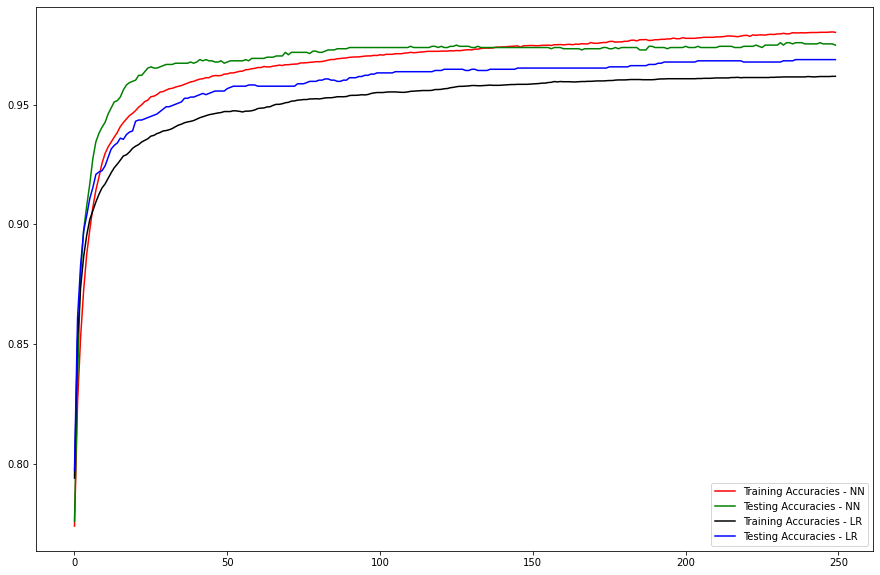

In [24]:
#comparing the results of NN and LR
plt.figure(figsize=(15,10))

# Neural Network plots
plt.plot(acc_nn.accuracies, 'r-', label = "Training Accuracies - NN")
plt.plot(acc_nn.test_accuracies, 'g-', label = "Testing Accuracies - NN")

# Logistic Regression plots
plt.plot(acc_lr.accuracies, 'k-', label = "Training Accuracies - LR")
plt.plot(acc_lr.test_accuracies, 'b-', label = "Testing Accuracies - LR")
plt.legend()

#### Plotting the outputs of this layer of the NN.


In [25]:
new_model = Model(layers[:-2])
testing_plot = new_model(testing_data_x)

Text(0.5, 1.0, 'Outputs')

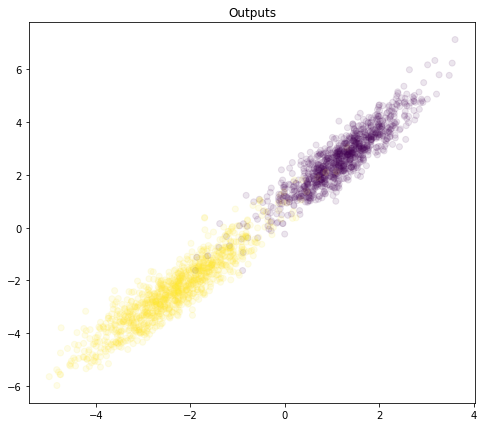

In [26]:
# Plotting the scatter plot of points and color coding by class
plt.figure(figsize=(8,7))
plt.scatter(testing_plot[:,0], testing_plot[:,1], alpha = 0.1, c = y_test.ravel());
plt.title('Outputs')

Probability contours

In [27]:
model_prob = Model(layers[-2:]) 

In [28]:
#creating the x and y ranges according to the above generated plot.
x_range = np.linspace(-4, 1, 100) 
y_range = np.linspace(-6, 6, 100) 
x_grid, y_grid = np.meshgrid(x_range, y_range) # x_grid and y_grig are of size 100 X 100

# converting x_grid and y_grid to continuous arrays
x_gridflat = np.ravel(x_grid)
y_gridflat = np.ravel(y_grid)

# The last layer of the current model takes two columns as input. Hence transpose of np.vstack() is required.
X = np.vstack((x_gridflat, y_gridflat)).T

prob_contour = model_prob(X).reshape(100,100) 

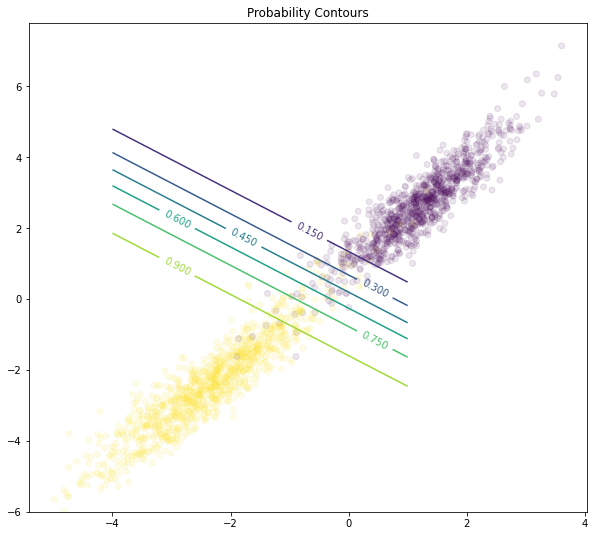

In [29]:
plt.figure(figsize=(10,9))
plt.scatter(testing_plot[:,0], testing_plot[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(x_grid,y_grid,prob_contour)
plt.title('Probability Contours')
plt.clabel(contours, inline = True );